# Fatima Fellowship Quick Coding Challenge (Pick 1)

Thank you for applying to the Fatima Fellowship. To help us select the Fellows and assess your ability to do machine learning research, we are asking that you complete a short coding challenge. Please pick **1 of these 5** coding challenges, whichever is most aligned with your interests. 

**Due date: 1 week**

**How to submit**: Please make a copy of this colab notebook, add your code and results, and submit your colab notebook to the submission link below. If you have never used a colab notebook, [check out this video](https://www.youtube.com/watch?v=i-HnvsehuSw).

**Submission link**: https://airtable.com/shrXy3QKSsO2yALd3

# 2. Deep Learning for NLP

**Fake news classifier**: Train a text classification model to detect fake news articles!

* Download the dataset here: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset
* Develop an NLP model for classification that uses a pretrained language model
* Finetune your model on the dataset, and generate an AUC curve of your model on the test set of your choice. 
* [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.
* *Answer the following question*: Look at some of the news articles that were classified incorrectly. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

In [ ]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

In [2]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/MyDrive/Coding_challenge

/content/gdrive/MyDrive/Coding_challenge


In [4]:
!pip install -q transformers


     |████████████████████████████████| 3.8 MB 8.2 MB/s 
     |████████████████████████████████| 6.5 MB 34.2 MB/s 
     |████████████████████████████████| 67 kB 5.1 MB/s 
     |████████████████████████████████| 895 kB 43.3 MB/s 
     |████████████████████████████████| 596 kB 55.8 MB/s 


In [5]:
import numpy as np
import pandas as pd
import torch
import time
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# paramters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#unzipp data
#!unzip "archive.zip" -d "data/"

In [6]:
df_true = pd.read_csv('data/True.csv')
df_fake = pd.read_csv('data/Fake.csv')

len(df_true), len(df_fake)

(21417, 23481)

In [7]:
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [8]:
display(df_fake)

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date  
0      December 31, 2017  
1      December 31, 2017  
2      December 30, 2017  
3      December 29, 2017  
4      December 25, 2017  
...                  ...  
23476   January 16, 2016  
23477   January 16, 2016  
23478   January 15, 2016  
23479   January 14, 2016  
23480   January 12, 2016  

[23481 rows x 4 columns]

#Data visualization

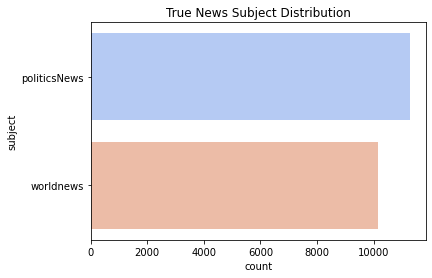

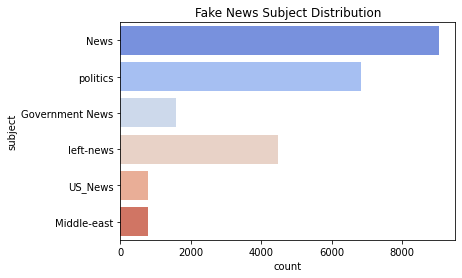

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="subject", palette="coolwarm", data=df_true).set_title('True News Subject Distribution')
plt.show()

sns.countplot(y="subject", palette="coolwarm", data=df_fake).set_title('Fake News Subject Distribution')
plt.show()

#wordcloud for true news

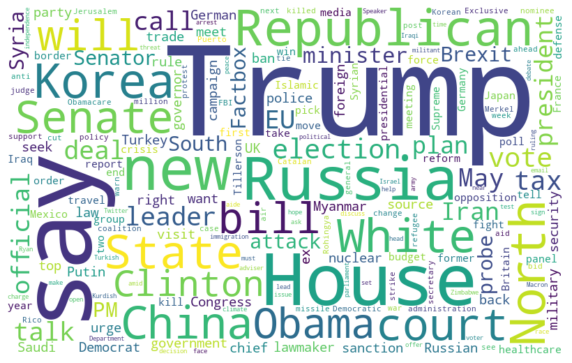

In [10]:
from wordcloud import WordCloud

real_titles = df_true.title
real_titles_ls = [text for text in real_titles]
# print(alls)
real_all_words = ' '.join(real_titles)
wordcloud_real = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(real_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.show()

#wordcloud for fake news

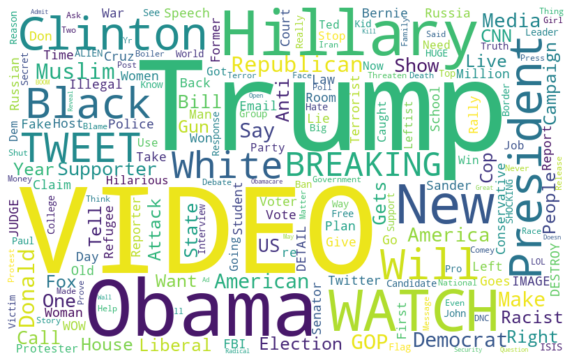

In [11]:
fake_titles = df_fake.title
fake_titles_ls = [text for text in fake_titles]
# print(alls)
fake_all_words = ' '.join(fake_titles)
wordcloud_fake = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(fake_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
# adding label
df_true["label"] = [1]*len(df_true) 
df_fake["label"] = [0]*len(df_fake)

In [13]:
# concatenate bothe dataset 
df = pd.concat([df_true, df_fake]).sample(frac=1).reset_index(drop=True)

# merge the title to the text
df["body"] = df["title"] + '' + df['text']

# drop unneeded columns
df.drop(["title", "text", "subject", "date"], axis=1, inplace=True)

df.drop_duplicates(inplace=True)

df.dropna(inplace=True)

In [14]:
#split data into train and tets

train, valid, test = np.split(df, [int(0.8*len(df)), int(.9*len(df))])
X_train, y_train = train.body, train.label
X_valid, y_valid = valid.body, valid.label
X_test, y_test   = test.body , test.label

assert len(X_train) == len(y_train) and len(X_valid) == len(y_valid) and len(X_test) == len(y_test)
assert len(df) == len(X_train) + len(X_valid) + len(X_test)

In [16]:
#load the pretrained language model
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

model_name = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(model_name, do_lower_case=True)
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=1)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifi

In [17]:
def encode_samples(samples, tokenizer, max_length):
    """
    Converts words to (BERT) tokens.
    Note that words can be composed of multiple tokens.

    Parameters
    ----------
    samples: list(str)
        A X_train_tokenslist of strings where each string is a sentence.
    tokenizer: transformers.PreTrainedTokenizer
        The BERT's pre-trained tokenizer.
    
    Returns
    -------
    X: list(int)
        A list of integers where each integer represents the sub-word index
        according to the `tokenizer`.
    """
    X = {"input_ids": [], "attention_mask": []}
    for i in tqdm(range(len(samples)//50+1), "Encoding"):
        batch = samples[i*50:50*(i+1)]
        tokens_batch = tokenizer(batch, truncation=True, padding=True, max_length=max_length)
        X["input_ids"].extend(tokens_batch.data["input_ids"])
        X["attention_mask"].extend(tokens_batch.data["attention_mask"])
    return X

In [20]:
from tqdm import tqdm
max_length = 512
X_train_tokens = encode_samples(X_train.tolist(), tokenizer, max_length)
X_valid_tokens = encode_samples(X_valid.tolist(), tokenizer, max_length)
X_test_tokens = encode_samples(X_test.tolist(), tokenizer, max_length)

Encoding: 100%|██████████| 79/79 [00:48<00:00,  1.64it/s]


In [21]:
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, samples, labels):
        self.samples = samples
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.samples.items()}
        item["labels"] = torch.tensor([self.labels[idx]], dtype=torch.float)
        return item

    def __len__(self):
#         return len(self.labels)
        return len(self.samples["input_ids"])

In [22]:
train_dataset = NewsDataset(X_train_tokens, y_train.tolist())
valid_dataset = NewsDataset(X_valid_tokens, y_valid.tolist())
test_dataset = NewsDataset(X_test_tokens, y_test.tolist())

In [23]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred, threshold=0.5):
    labels = pred.label_ids
    preds = torch.nn.Sigmoid()(torch.from_numpy(pred.predictions)) > threshold
    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [25]:
# hyper-parameters
epochs = 3
batch_size = 32

In [ ]:
from transformers import Trainer, TrainingArguments

trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    train_dataset=train_dataset,         # training dataset
    eval_dataset=valid_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
    args=TrainingArguments(
        output_dir='./results',          # output directory
        num_train_epochs=epochs,              # total number of training epochs
        per_device_train_batch_size=batch_size,   # batch size per device during training
        per_device_eval_batch_size=batch_size,   # batch size for evaluation
        warmup_steps=500,                # number of warmup steps for learning rate scheduler
        weight_decay=0.01,               # strength of weight decay
        logging_dir='./logs',            # directory for storing logs
        load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
        # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
        logging_steps=400,               # log & save weights each logging_steps
        save_steps=400,
        evaluation_strategy="steps",     # evaluate each `logging_steps`
    )
)

# train the model
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 31284
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 2934


In [ ]:
#prediction
test_preds = trainer.predict(test_dataset)

In [ ]:
test_preds


In [ ]:
from sklearn.metrics import roc_curve

labels = np.array(test_dataset.labels)
preds = torch.nn.Sigmoid()(torch.from_numpy(test_preds.predictions)).numpy()
fpr, tpr, thresholds = roc_curve(labels, preds)

In [ ]:
import matplotlib.pyplot as plt

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#end of code

**Write up**: 
* Link to the model on Hugging Face Hub: 
* Include some examples of misclassified news articles. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

#some suggestion to improve this project

*   add epochs in training
*   try with another pretrained model

